# MT3510 Introduction to Mathematical Computing:

## Pure Mathematics Individual Project

## Sem 2, 2022/23

# Eulerian and Hamiltonian Graphs

This document outlines the individual project on Eulerian and Hamiltonian graphs for MT3510. It is important that you read this document carefully before starting any work.


## Getting help

Questions and queries are permitted, within reason, and can be directed to Dr Smith or the week 7 & 8 lab demonstrators. The preferred route of contact for outside the lab is email (fls3@).

## Submitting the project

Submission deadline is 5pm Friday 24th March via MySaint/MMS.

Submit a single Notebook file (as with the tutorials).

Late submissions will be dealt with using the standard policy (see [here](https://www.st-andrews.ac.uk/mathematics-statistics/students/taught-modules/late-work/)).

## Marking breakdown

| Code  60%                   | Written Answers 30% | Originality/Initiative 10% |
| --------------------------- | ------------------- | -------------------------- |
| Correct results 40%         | Accuracy 20%        | Free-choice extension 10%  | 
| Asymptotic complexity 10%   | Conciseness 10%     |                            |
| Readability and style 10%   |                     |                            |

The originality/initiative is available for work that extends the project specifications in some way. It is up to you what this looks like, but you should describe any such extension in the cell available at the end of this notebook. Please be sensible about the amount of extra work you do for this $10\%$; you are welcome to discuss it with me before submission.

## Project Description


In 1736, Leonhard Euler showed that there was no way to travel across the [Seven Bridges of Königsberg](https://en.wikipedia.org/wiki/Seven_Bridges_of_K%C3%B6nigsberg), crossing each bridge a single time and ending up where you started. He did this by showing that there is no *Eulerian circuit* in a graph representing the city, where vertices represent landmasses and edges represent bridges between them. This established the first result in graph theory.

More precisely, an *Eulerian circuit* is a cycle $v_1, v_2, \ldots, v_k = v_1$ such that every edge of the graph appears as $\{v_i, v_{i+1}\}$ for some $1 \leq i \leq k$, and no edge is repeated. In other words, it is a cycle which contains every edge of the graph precisely once. You can think about this as some way of travelling around the graph, crossing each edge precisely once. Note that this does **not** mean that each vertex has to be visited precisely once (or even at all!)

We say that a graph is *Eulerian* if there is some Eulerian circuit in the graph.

Euler's realisation was that the existence of an Eulerian circuit is related to the degrees of the vertices.


***Theorem:*** a graph has an Eulerian circuit if and only if every vertex has even degree, and all of the vertices of positive degree are in one connected component.

A few examples are shown below.

**1:** This example is Eulerian: every vertex has even degree, and there is only one connected component. An Eulerian circuit is `[0, 1, 2, 3, 4, 1, 3, 0]`.

**2:** This example is not Eulerian: it has a single connected component, but vertices 1 and 4 have odd degree.

**3:** This example is Eulerian: it does have multiple connected components, but only one of them contains vertices of positive degree, and each vertex has even degree. An Eulerian circuit is `[0, 1, 2, 3, 4, 1, 3, 0]`.

**4:** This example is not Eulerian; every vertex has even degree but the positive-degree vertices don't lie in a single connected component.

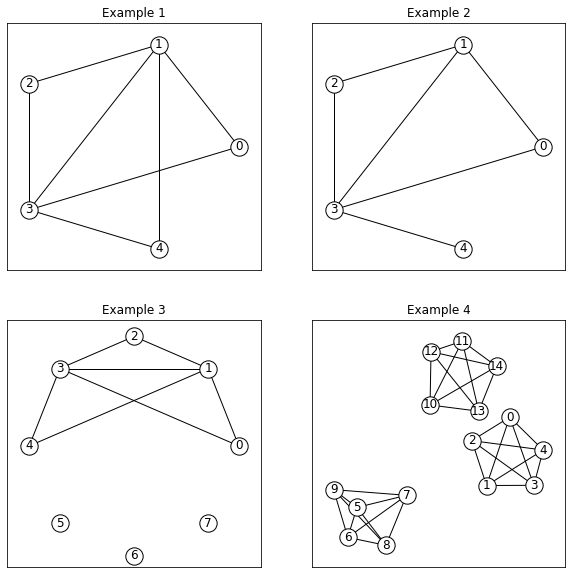

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

G = nx.Graph([{0, 1}, {1, 2}, {2, 3}, {3, 4}, {4, 1}, {1, 3}, {0, 3}])
nx.draw_networkx(G, ax=axs[0, 0], pos=nx.circular_layout(G), node_color="w", edgecolors="k")

G.remove_edge(4, 1)
nx.draw_networkx(G, ax=axs[0, 1], pos=nx.circular_layout(G), node_color="w", edgecolors="k")

G.add_edge(4, 1)
G.add_nodes_from(range(5, 8))
nx.draw_networkx(G, ax=axs[1, 0], pos=nx.circular_layout(G), node_color="w", edgecolors="k")

G = nx.caveman_graph(3, 5)
nx.draw_networkx(G, ax=axs[1, 1], pos = nx.spring_layout(G, k=1.1), node_color="w", edgecolors="k")

axs[0, 0].set_title("Example 1")
axs[0, 1].set_title("Example 2")
axs[1, 0].set_title("Example 3")
axs[1, 1].set_title("Example 4");


## Part 1

One of the proofs of the theorem above is constructive; it defines an algorithm and then shows that the algorithm outputs an Eulerian circuit given the hypotheses of the theorem. The algorithm is as follows:

```
1. Initialise a stack of vertices: pick a vertex u in G, and set stack = [u]
2. Initialise an output circuit: set circuit = []
3. While the stack is not empty:
    4. Call the last element in the stack current_vertex.
    5. If there are any edges from current_vertex that haven't already been considered:
        6: Pick one such edge {current_vertex, neighbour}.
        7. Note that this edge cannot be used again (from either direction).
        8. Append neighbour to the stack.
    9. Otherwise, if there are no such edges, then pop current_vertex from the stack and append it to circuit.
10. Return circuit.
```
The algorithm above finds an Eulerian circuit in a *connected* graph if it has one.

-  Implement this algorithm as a function `eulerian_circuit`.

-  Describe the theoretical worst-case complexity of `eulerian_circuit`, using appropriate parameters for the input size. Is it possible for any algorithm for finding an Eulerian circuit in a connected graph to have a better worse-case complexity than this?

#### Details/clarifications

1. For full credit, your function should not introduce any extra asymptotic complexity not already inherent in the algorithm.
2. You should assume while writing this function that the input will be a connected `networkx` `Graph` which has an Eulerian circuit.
3. You should assume while describing the complexity that $G$ is represented as $(V, E)$ as usual.
4. You are free to assume that the vertices will be the integers `0, 1, ..., len(G) - 1`.
5. If there is no Eulerian circuit, you should instead return `None`.

In [21]:
# YOUR CODE HERE
import networkx as nx

def eulerian_circuit(G):
    
    u = 0           # Value of start point is arbitary, set it to be zero
    stack = [u]
    circuit = []
    seen_edge = []  # Creating a list that will sort sets of edges that have been 'seen'
    
    for v in G:                                # Loop to check if all verticies have even degree
        if G.degree[v]%2 != 0:
            return None

    while stack:
        current_vertex = stack[-1]              # Calling last element of the stack
       
        for neighbour in G[current_vertex]:     # Iterates through the neighbours of the current vertex
            
            edge = {current_vertex, neighbour}  # Defines a non-directional edge 
            
            if edge not in seen_edge:           # Marks edge as seen and adds current_vertex's neigbour to the stack 
                seen_edge.append(edge)
                stack.append(neighbour)
                break                           # Require break statement from if statemnet 
        
        else:                                   
            current_vertex = stack.pop()        
            circuit.append(current_vertex)
    
    return circuit   

YOUR ANSWER HERE

The worst case complexity for the eulerian_circuit function is $ O(|V| + |E|^2) $, where $|E|$ is he number of edges.

This is because the for loop inside the while statement will through each edge, thus the complexity scales proportionally with the number of edges. Checking if the edge has been seen also adds complexity as the list of seen_edge must be looped through to check if it hasnt been seen. In the worst case, the list will be $|E|$ long thus the task will have complexity of $ O(|E|) $. As is it is inside the original, the overall complexity of the loop is $ O(|E|^2) $. 

The for loop checking the degree of each vertex adds complexity $O(|V|)$. It is nessescary as the examples show this algorithm can 'add' and imaginary edge and produce a false Eulerian curcuit. This condition means that an Eulerian Curcuit is only produced when one exists and there will be no inncorrect circuits outputted.

There will exist an algorithm that will be able to find the Eulerian Circuit of a graph. The best-case complexity of such an alogrithm would be $ O(|E|) $. As the function would still have to loop through all edges. However, if a data structure was used to keep track of unused edges there would be no added complexity. For example, you can search through a set with constant time.

In [14]:
if not "eulerian_circuit" in globals():
    raise NotImplementedError("eulerian_circuit not defined")


## Part 2

In order to apply the theorem, we need to be able to check whether all of the positive-degree vertices are connected. One way of doing this is to start a traversal from any positive-degree vertex, and check if it visits all of the others.


- Implement a function `all_positive_degree_vertices_connected` which takes a `networkx` `Graph` and returns `True` if all vertices of positive degree are connected, and `False` otherwise. This should use a depth-first or breadth-first traversal.

- Describe the complexity of decioing whether a graph is Eulerian using:
    1. A combination of the functions `eulerian_circuit` and `all_positive_degree_vertices_connected` (i.e. testing whether `eulerian_circuit` returns `None` or `all_positive_degree_vertices_connected` returns `False`).    
    2. Directly applying the characterisation using degrees as described in the introduction.
    - In other words, answer the question "*can we achieve a better theoretical complexity using the theorem above if we only want to **decide** whether there is an Eulerian circuit, rather than find one*?"

**Details/Clarifications**
1. The same details as for part 1 apply, other than `G` being connected.

In [15]:
# YOUR CODE HERE
def all_positive_degree_vertices_connected(G):
    # Required to start on a vertex with a postitive degree, must find this vertex first
    
    postive_deg_vertices = []
    
    for v in G:
        if G.degree[v] > 0:
            postive_deg_vertices.append(v) # Store all postive degree vertices in a list
    
    if len(postive_deg_vertices) == 0:
        return False                       # Returns false if there are no verticies with postive degree
  
    # Depth-first traversal to see what vertices are connected to the start point, u
    
    u = postive_deg_vertices[0]
    stack = [u]                            # Start stack on arbitary postive degree vertex               
    seen = set()
    
    while stack:
        current_vertex = stack.pop()
        
        if current_vertex not in seen:     # Iterates through verticies connected to the first positive degree vertex
            seen.add(current_vertex)
            stack.extend(G[current_vertex])
    
    for v in postive_deg_vertices:
        if v not in seen:
            return False                    # Retruns False if there is a postive degree vertex thats not been seen
        
    return True 

YOUR ANSWER HERE

The complexity of all_positive_degree_vertices_connected is $ O(|E| + |V|) $, where $|V|$ is the number of verticies.
This is because looping through the verticies to find ones with postive degree adds complexity proportional to the number of verticies. The depth first traversal of the graph has complexity of $ O(|E|) $. Finally, the function checks if all postitive verticies were visited, which would take $ O(|V|) $ in the worst case when all verticies has a postive degree ie the list is $ |V| $ long.

If this returns False then there is no Eulerian Circuit, and this was determined with complexity $ O(|E| + |V|) $ as only all_positive_degree_verticies_connected was used. However, if it returns true then we must use the eulerian_circuit function previously defined. We know it has worst case complexity $ O(|V| + |E|^2) $. Therefore the overall worst case complexity of a combination of the two would be $O(|V| + |E|^2) $. 

Using the provided theorem we must check for even degrees which would have complexity of $ O(|V|) $ as all verticies must be checked. Then checking if the positive degrees are connected would have a complexity of $ O(|E|) $ in the worst case when all verticies have a positive degree. Giving this algorithm an overall complexity of $ O(|E| + |V|) $.

It is now possible to conclude that using this theorem does provide a better complexity in comparison to a combination of our two algorithms.

In [16]:
if not "all_positive_degree_vertices_connected" in globals():
    raise NotImplementedError("all_positive_degree_vertices_connected not defined")

## Part 3

In the same way that an *Eulerian* cycle is one which contains every edge precisely once, a *Hamiltonian* cycle is one which contains every *vertex* precisely once (apart from whichever vertex is picked to be "first", which must be visited twice to obtain a cycle). Determinining whether a graph is *Hamiltonian* (contains a Hamiltonian cycle) is significantly harder than determining whether it is Eulerian. In particular, it is NP-complete.


- Implement a function `hamiltonian_cycle` which uses a backtrack search to find a Hamiltonian cycle in a graph, if one exists.
- Use your function to find a Hamiltonian cycle in the Hoffman-Singleton graph.

Details:
1. Your function should return `None` if the graph is not Hamiltonian.
2. You should return a `list` of vertices representing the cycle; the first vertex in the list should also appear at the end to close the cycle.

[0,
 1,
 17,
 4,
 3,
 5,
 12,
 11,
 2,
 10,
 18,
 6,
 22,
 13,
 30,
 19,
 7,
 34,
 15,
 35,
 25,
 9,
 32,
 23,
 14,
 31,
 20,
 37,
 29,
 16,
 33,
 27,
 44,
 43,
 42,
 26,
 38,
 24,
 41,
 40,
 21,
 36,
 39,
 28,
 48,
 47,
 45,
 46,
 49,
 8,
 0]

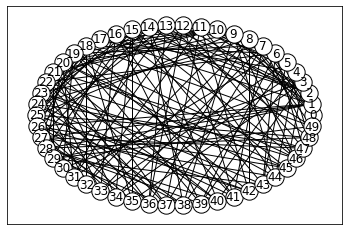

In [17]:
# YOUR CODE HERE
def hamiltonian_cycle(G):
    
    u = 0                              
    cycle  = [u]                                  # Start point is arbitary as it is searching for a cycle, use vertex 0
    used_verticies = set()
    
    
    def dive():
        if len(cycle) == len(G):                  # Preforms a check once end of potential cycle is reached
            
            if u in G[cycle[-1]]:                 # Checks if there is an edge from starting vertex to end vertex
                cycle.append(u)                   # Add starting element at the end to make it a cycle, not a path
                return cycle
            return None                           # Returns None if check not statisfied
        
        current_vertex = cycle[-1]
        
        used_verticies.add(current_vertex)        # Keep track of verticies we've used
    
        for neighbour in G[current_vertex]:            
            cycle.append(neighbour)               # Attempt to use each neighbour in the cycle
            
            if neighbour not in used_verticies:   # Check if neighbour is already in cycle
                res = dive()
                if res != None:
                    return res
            cycle.pop()                           # Remove current_vertex from cycle if solution was incorrect
            
        used_verticies.remove(current_vertex)     # Remove current_vertex from set of used if solution was incorrect
        return None
    return dive()

G = nx.hoffman_singleton_graph()
nx.draw_networkx(G, pos=nx.circular_layout(G), node_color="w", edgecolors="k")           
hamiltonian_cycle(G)

In [18]:
if not "hamiltonian_cycle" in globals():
    raise NotImplementedError("hamiltonian_cycle has not been defined")

## Originality/Initiative

As described in the introduction, the maximum grade available without going beyond the project specifications is $90\%$, and to achieve the final $10\%$ you must extend the project in some way. What form this takes is entirely up to you, as long as you still meet the specifications of each part. You are welcome to discuss this with me before submission.

If you have extended the project in some way, then please briefly outline what you have done in the cell below.

YOUR ANSWER HERE

## Eulerian Paths
Bellow I created a function that will return an Eulerian Path of a graph, if there is one. I used the theorem; **"A graph has an Eulerian path if and only if every vertex of degree greater than or equal to 1 lies in the same connected component,** and **there are 0 or 2 vertices of odd degree."** 

The functions defined in Q1 and Q2 are called upon in eulerian_path. Firstly, it is checked that all postivie degree vertices are connected using Q2's function, as this means a valid path can be found. Then eularian_circuit is called if all vertcies have a even degree, as according to the theorem given to us in the description a eularian curcit will then exist, which by definition is a path that start and end point are the same vertex. The remaineder of the function shares a significant amount of code with Q1, iterating through the edges to find an Eularian Path. The function will return None if no Eulerian Path exists

In [19]:
def eulerian_path(G):
    
    if all_positive_degree_vertices_connected(G) == False:
        return None                            # Preform check to confirm if a valud path can be found
    
    odd_vertex = []                            
    
    for v in G:                                # Loop to find and store all odd degree verticies
        if G.degree[v]%2 != 0:                
            odd_vertex.append(v)
            
    if len(odd_vertex) == 0:                   # Will have Eulerian Circuit if all degrees are even so use previous function
        path = eulerian_circuit(G)
        return path                            # A circuit is a path that starts and ends on the same vertex. Therefore this is a valid Eulerian Path
            
    if len(odd_vertex) != 2:
        return None
    
    u = odd_vertex[0]                           # Value of start point to be one of the odd degree vertices
    stack = [u]
    path = []
    seen_edge = []                              # Creating a list that will sort sets of edges that have been 'seen'
    
    while stack:
        current_vertex = stack[-1]              # Calling last element of the stack
       
        for neighbour in G[current_vertex]:     # Iterates through the neighbours of the current vertex
            
            edge = {current_vertex, neighbour}  # Defines a non-directional edge 
            
            if edge not in seen_edge:           # Marks edge as seen and adds current_vertex's neigbour to the stack 
                seen_edge.append(edge)
                stack.append(neighbour)
                break                           # Require break statement from if statemnet 
        
        else:                                   
            current_vertex = stack.pop()        
            path.append(current_vertex)
    
    return path